In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [5]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\AAME.csv")
df
df_filtered = df[df['Open'] != 0.0].reset_index(drop=True)

In [7]:
# 4개 컬럼 선택
features = df_filtered[['Open', 'High', 'Low', 'Close']].values

In [19]:
# 정규화
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
# 시계열 데이터 생성 함수
def make_multivariate_io(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])     # (7, 4)
        y.append(data[i+window])       # (4,)
    return np.array(X), np.array(y)

In [23]:
# 시퀀스 생성
window_size = 7
X, y = make_multivariate_io(scaled_features, window_size)

In [25]:
# 훈련/테스트 분리
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [27]:
# LSTM 모델 구성
model = Sequential()
model.add(Input(shape=(window_size, 4)))
model.add(LSTM(32, activation='tanh'))  # LSTM 사용
model.add(Dense(4))  # Open, High, Low, Close 예측

model.compile(optimizer='adam', loss='mean_squared_error')

# 학습
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# 예측
pred = model.predict(X_test)

Epoch 1/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0094
Epoch 2/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.3213e-04
Epoch 3/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.2839e-04
Epoch 4/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.1706e-04
Epoch 5/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.9926e-04
Epoch 6/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.7551e-04
Epoch 7/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4993e-04
Epoch 8/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5195e-04
Epoch 9/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4676e-04
Epoch 10/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4445e-04
Epoch 11/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3099e-04
Epoch 12/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3522e-04
Epoch 13/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4056e-04
Epoch 14/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.

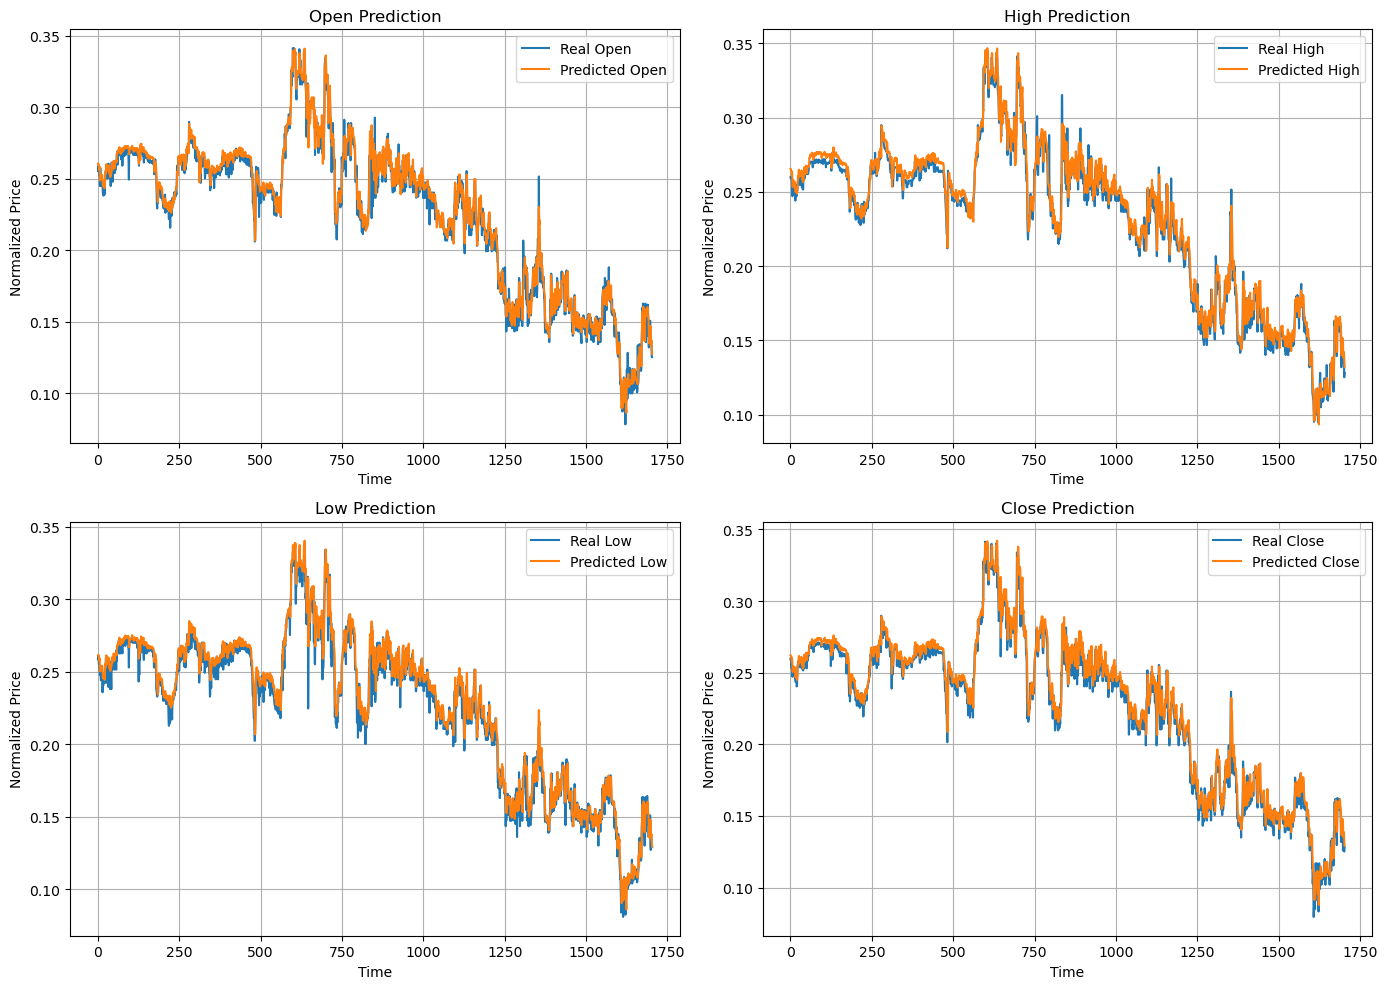

In [28]:
# 시각화 (Open, High, Low, Close 각각)
labels = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(14, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_test[:, i], label=f'Real {labels[i]}')
    plt.plot(pred[:, i], label=f'Predicted {labels[i]}')
    plt.title(f'{labels[i]} Prediction')
    plt.xlabel("Time")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()